### train 이미지 데이터 숫자 변환 전체코드

In [41]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
 
TRAIN_DIR = 'D:/MNIST/trainingSet/'
train_folder_list = array(os.listdir(TRAIN_DIR))
 
train_input = []
train_label = []
 
label_encoder = LabelEncoder()  # LabelEncoder Class 호출
integer_encoded = label_encoder.fit_transform(train_folder_list)
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
 
for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        train_input.append([np.array(img)])
        train_label.append([np.array(onehot_encoded[index])])
 
train_input = np.reshape(train_input, (-1, 784))
train_label = np.reshape(train_label, (-1, 10))
train_input = np.array(train_input).astype(np.float32)
train_label = np.array(train_label).astype(np.float32)
#tmp = [[x,y] for x, y in zip(train_input, train_label)]
#np.random.shuffle(tmp)
#train_input = [n[0] for n in tmp]
#train_label = [n[1] for n in tmp]
np.save("train_data.npy", train_input)
np.save("train_label.npy", train_label)

C:\Users\tldud\.conda\envs\tldud\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### train 이미지 파일 path

In [1]:
import os
import numpy as np
from numpy import array
TRAIN_DIR = 'D:/MNIST/trainingSet/'
train_folder_list = array(os.listdir(TRAIN_DIR))
train_folder_list

array(['0_zero', '1_one', '2_two', '3_three', '4_four', '5_five', '6_six',
       '7_seven', '8_eight', '9_nine'], dtype='<U7')

### 라벨링

In [2]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()  # LabelEncoder Class 호출
integer_encoded = label_encoder.fit_transform(train_folder_list)
integer_encoded

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [3]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print('integer_encoded:\n', integer_encoded)
print('onehot_encoded:\n', onehot_encoded)

integer_encoded:
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
onehot_encoded:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


C:\Users\tldud\.conda\envs\tldud\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### 이미지를 불러와서 흑백으로 벡터화 

In [4]:
import cv2
train_input = []
train_label = []
for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # cv2.imread: paht경로에 있는 이미지를 흑백으로 불러옴
        train_input.append([np.array(img)])
        train_label.append([np.array(onehot_encoded[index])])

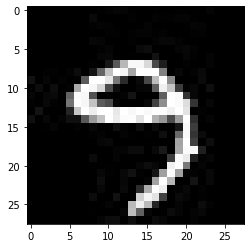

In [6]:
# 마지막 이미지 시각화
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img, cmap='gray')

### list형태를 np.array형태(42000,784)로 reshape

In [8]:
len(train_input) #train_input은 [[array],[array],...,[array]] 이런 형태

42000

In [15]:
train_input[0][0].shape

(28, 28)

In [16]:
train_input = np.reshape(train_input, (-1, 784))
# 이때 -1은 정확한 개수를 모를때 사용. -1대신 42000 넣어도 상관x
train_label = np.reshape(train_label, (-1, 10))
train_input = np.array(train_input).astype(np.float32)
train_label = np.array(train_label).astype(np.float32)
np.save("train_data.npy", train_input)
np.save("train_label.npy", train_label)
print('train_input.shape: ', train_input.shape)
print('train_label.shape: ', train_label.shape)

train_input.shape:  (42000, 784)
train_label.shape:  (42000, 10)


### test 이미지 데이터 숫자 변환 전체코드

In [17]:
TEST_DIR = 'D:/MNIST/testSet/'
test_folder_list = array(os.listdir(TEST_DIR))
 
test_input = []
test_label = []
 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(test_folder_list)
 
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
 
for index in range(len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        test_input.append([np.array(img)])
        test_label.append([np.array(onehot_encoded[index])])
 
test_input = np.reshape(test_input, (-1, 784))
test_label = np.reshape(test_label, (-1, 10))
test_input = np.array(test_input).astype(np.float32)
test_label = np.array(test_label).astype(np.float32)
np.save("test_input.npy",test_input)
np.save("test_label.npy",test_label)

C:\Users\tldud\.conda\envs\tldud\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [18]:
print('test_input.shape: ', test_input.shape)
print('test_label.shape: ', test_label.shape)

test_input.shape:  (200, 784)
test_label.shape:  (200, 10)


### CNN 모델 설계 전체코드

In [ ]:
import tensorflow as tf
 
# hyper parameters
learning_rate = 0.001
 
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])
 
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
 
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
 
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b
 
# define cost/loss &amp;amp;amp; optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### placeholder: 변수를 담을 그릇 만들기

In [19]:
import tensorflow as tf
 
# hyper parameters
learning_rate = 0.001

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
# placeholder: 재료를 담는 그릇 또는 쟁반
# 데이터 타입을 float32로 지정. 
# [None, 784] : 784의 shape을 갖는 데이터를 0~무한대까지 불러올 수 있음
X_img = tf.reshape(X, [-1, 28, 28, 1])   
# img 28x28x1 (black/white) 
# 이때 -1은 batch size. 배치 사이즈는 가변할 수 있으므로 보통 -1로 지정함.
# 마지막 1은 channel 수를 의미.
# grayscale로 이미지를 불러올 경우 1, RGB로 불러올 경우 3
Y = tf.placeholder(tf.float32, [None, 10])
# output data를 불러올 변수를 선언
# label의 shape이 [-1,10]dlamfh [None, 10]을 기입 

### Convolution layer, max-pooling layer 구현

In [20]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
# 초기 가중치 설정
# 3*3필터를 사용. 1은 input데이터의 channel, 32는 필터를 32개 쓰겠다는 말
# stddev=0.01 : 생성된 난수의 변동이 0.01이라는 뜻 
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
# Convolution layer를 선언하여 L1에 저장
# X_img는 해당 Convolution layer의 input
# W1은 앞서 선언한 Convolution layer의 필터. 
# 즉, X_ing에 W1 필터를 활용하여 Convolution layer를 구성하겠다는 뜻 
# strides = [1,1,1,1] : stride를 어떻게 움직일 것인가를 설정하는 구문 
# 첫번째 1은 모든 batch에 대해 convolution filter를 적용하겠다는 의미
# 마지막 1은 모든 채널에 대해 convolution filter를 적용하겠다는 의미
# 두번째와 세번째의 1은 필터를 움직일 때 우측으로 한칸 씩, 아래로 한칸 씩 움직인다는 의미 
# padding='SAME' : convolution 연산 후 shape이 줄어드는 것을 방지하기 위하여 설정하는 구문
# 만약 padding='VALID'로 설정하면 3*3필터가 28*28이미지를 한칸 씩 움직이며 
# 연산을 수행하므로 convolution 연산 이후 출력된 결과의 shape은 26*26임.
L1 = tf.nn.relu(L1)
# Convolution layer의 연산 결과를 RELU activaion function에 적용하겠다는 의미
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# max-pooling layer를 선언하여 L1애 저장
# 입력변수는 이전에 선언된 L1
# ksize=[1,2,2,1] : kernel사이즈. convolution layer의 filter와 동일한 개념.
# 첫번째 1은 모든 batch에 대해 kernel을 적용하겠다는 의미
# [2,2]는 2*2크기의 kernel을 사용하겠다는 의미
# 마지막 1음 모든 채널에 대해 적용하겠다는 의미
# strides=[1,2,2,1] ; kernel 사이즈와 보통 같게 설정 
# 2*2 kernel을 사용한다면 오른쪽과 아래로 2칸씩 움직임

In [21]:
# convolution layer와 max-pooling layer을 한번 더 적용
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [22]:
L2.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

### fully-connected layer 구현

In [23]:
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])
# L2의 shape을 [-1, 7*7*64]로 만들어 L2_flat에 저장
# 이유는 다음과 같다.
# 처음 input data의 shape은 28*28*1이었다. 
# input data가 convolution layer(L1)을 거쳐 32개의 3*3의 필터와 연산되었으므로 
# 이 때의 연산 결과는 28*28*32가 된다.
# (padding="SAME"으로 지정하여 data의 크기는 변하지 않는다)
# L1은 max-pooling layer(L1)을 거쳐 2*2의 kernel으로 max-pooling 연산을 수행했으므로
# 이 때의 연산 결과는 14*14*32가 된다. 
# 마찬가지로 convolution layer(L2)에서 3*3*64 연산을 수행하면 14*14*64가 되며 
# max-pooling(L2)에서 2*2 kernel으로 max-pooling 연산을 수행하면 7*7*64가 된다.
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10], initializer=tf.contrib.layers.xavier_initializer())
# fully-connected 연산을 위해 weight를 선언하여 W3에 저장
# shpe = [7*7*64, 10] : input data의 shape이 7*7*64이고, 
#                       output data의 shape이 10(0~9)이므로 
#                       W3의 shape을 [7*7*64, 10]으로 설정
# weight의 초기값은 성능이 우수한 것으로 알려진 Xavier initializer를 사용
b = tf.Variable(tf.random_normal([10]))
# bias를 선언하여 b에 저장
# output의 shape이 10이므로 shape을 10으로 설정 
logits = tf.matmul(L2_flat, W3) + b
# L2_flat과 W3 행렬의 곱셈 연산을 수행한 후 bias를 더하여 logits에 저장

W0925 23:23:13.870505 11352 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



### cost function 최적화

In [24]:
# define cost/loss &amp;amp;amp; optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
# 예측 값(logitis)과 실제 값(Y)의 차이를 나타내는 Cost함수를 선언하여 cost에 저장
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# cost를 최소화하는 optimizer 함수를 선언 

W0925 23:29:00.597236 11352 deprecation.py:323] From <ipython-input-24-4c65c8155826>:2: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [25]:
logits

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

### 모델 학습

In [26]:
import time

#시작시간
start_time = time.time()

training_epochs = 15
# 학습 횟수를 설정
batch_size = 100
# 효과적인 모델 학습을 위해 batch size를 설정
# batch size는 학습할 때 몇 개의 데이터를 한번에 학습하는가에 관한 설정
# 본 실험에서는 42000개의 데이터를 학습하므로, batch size는 1~42,000까지 설정할 수 있음
# 100으로 설정했으므로 한번 학습하는데 100개의 데이터를 사용한다는 의미
 
# initialize
sess = tf.Session()
# tf.Session클래스를 sess에 저장
sess.run(tf.global_variables_initializer())
# 모든 변수의 weight값을 초기화
 
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    # 1 epoch 완료 시 cost의 평균값을 출력하기 위해 avg_cost를 선언한 후 0을 저장
    total_batch = int(len(train_input) / batch_size)
    # 1 epoch에 몇 회 학습할 것인지 설정 
    # train input에 저장된 데이터는 42,000개이므로 len(train_input)은 42,000을
    # batch size는 100을 설정했으므로 total_batch는 420이 됨 
    for i in range(total_batch):
        start = ((i+1) * batch_size) - batch_size
        # 데이터를 분할하기 위해 start라는 변수를 선언
        # i는 0에서 419까지 변함
        # i = 0일 때 start에 저장되는 값은 (0+1)*100)-100이므로 0이 저장
        end = ((i+1) * batch_size)
        # 데이터를 분할하기 위해 end라는 변수를 선언
        # i = 0일 때 emd에 저장되는 값은 (0+1)*100)이므로 100이 저장
        batch_xs = train_input[start:end]
        # batch_xs : train 데이터의 input을 저장하는 변수
        # train_input[start:end]는 train_input[0:100]과 같음
        # 즉, train_inpuf에서 0~100에 위치하는 데이터를 불러서 batch_xs에 저장
        batch_ys = train_label[start:end]
        # batch_ys = train 데이터의 label을 저장하는 변수
        # train_label[start:end]는 train_label[0:100]과 같음
        # train_label에서 0~100에 위치하는 데이터를 불러서 batch_ys에 저장
        feed_dict = {X: batch_xs, Y: batch_ys}
        # feed dictionary를 선언
        # X는 input data에 대한 placeholder이며, 
        # Y는 output data 즉, label를 담는 placeholder임
        # X에 batch_xs를 담고, Y에 batch_ys를 담음
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        # Session을 실행
        # cost와 optimizer를 실행한 후 c에 cost를 저장 
        avg_cost += c / total_batch
        # avg_cost += c/total batch : avg_cost에 (c/total_batch)를 더함
        # 즉, cost의 평균을 avg_cost에 더하여 저장
 
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
 
print('Learning Finished!')
print("--- %s seconds ---" % (time.time() - start_time))

Learning started. It takes sometime.
Epoch: 0001 cost = 3.827028446
Epoch: 0002 cost = 7.236712608
Epoch: 0003 cost = 2.479863492
Epoch: 0004 cost = 2.420645193
Epoch: 0005 cost = 2.235679866
Epoch: 0006 cost = 2.131891612
Epoch: 0007 cost = 1.954667708
Epoch: 0008 cost = 1.760371308
Epoch: 0009 cost = 1.457054643
Epoch: 0010 cost = 1.290886561
Epoch: 0011 cost = 1.178108456
Epoch: 0012 cost = 1.116682474
Epoch: 0013 cost = 1.077093674
Epoch: 0014 cost = 1.057836399
Epoch: 0015 cost = 1.030706614
Learning Finished!
--- 510.8892331123352 seconds ---


In [27]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
# 전체 test 데이터 중 실제로 맞춘 개수가 몇개인지 측정한 다음 
# correct_prediction에 저장
# tf.equal에서는 예측 값과 정답이 같으면 True 아니면 False값이 반환되는데
# 이것을 float형으로 바꾸고 평균을 계산해 정확도를 구함
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# 정확도의 평균을 구하여 accuracy에 저장 
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: test_input, Y: test_label}))
# Accuracy를 출력.
# feed_dict={X: test_input, Y: test_label} : X에 test_input을, Y에 test_input을 불러옴

Accuracy: 0.45


### 문제점: cost도 0으로 내려가지 않고, 정확도도 0.45밖에 안된다! 

# 방법1

### 배치를 random으로 선택하기

In [34]:
import time

#시작시간
start_time = time.time()

training_epochs = 15
# 학습 횟수를 설정
batch_size = 100
# 효과적인 모델 학습을 위해 batch size를 설정
# batch size는 학습할 때 몇 개의 데이터를 한번에 학습하는가에 관한 설정
# 본 실험에서는 42000개의 데이터를 학습하므로, batch size는 1~42,000까지 설정할 수 있음
# 100으로 설정했으므로 한번 학습하는데 100개의 데이터를 사용한다는 의미

# batch를 random으로 선택
train_size = train_input.shape[0]
batch_mask = np.random.choice(train_size, batch_size)    
    
# initialize
sess = tf.Session()
# tf.Session클래스를 sess에 저장
sess.run(tf.global_variables_initializer())
# 모든 변수의 weight값을 초기화
 
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    # 1 epoch 완료 시 cost의 평균값을 출력하기 위해 avg_cost를 선언한 후 0을 저장
    total_batch = int(len(train_input) / batch_size)
    # 1 epoch에 몇 회 학습할 것인지 설정 
    # train input에 저장된 데이터는 42,000개이므로 len(train_input)은 42,000을
    # batch size는 100을 설정했으므로 total_batch는 420이 됨 
    for i in range(total_batch):
        batch_xs = train_input[batch_mask]
        # batch_xs : train 데이터의 input을 저장하는 변수
        # train_input에서 batch_mask에 위치하는 데이터를 불러서 batch_xs에 저장
        batch_ys = train_label[batch_mask]
        # batch_ys = train 데이터의 label을 저장하는 변수
        # train_label에서 batch에 위치하는 데이터를 불러서 batch_ys에 저장
        feed_dict = {X: batch_xs, Y: batch_ys}
        # feed dictionary를 선언
        # X는 input data에 대한 placeholder이며, 
        # Y는 output data 즉, label를 담는 placeholder임
        # X에 batch_xs를 담고, Y에 batch_ys를 담음
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        # Session을 실행
        # cost와 optimizer를 실행한 후 c에 cost를 저장 
        avg_cost += c / total_batch
        # avg_cost += c/total batch : avg_cost에 (c/total_batch)를 더함
        # 즉, cost의 평균을 avg_cost에 더하여 저장
 
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
 
print('Learning Finished!')
print("--- %s seconds ---" % (time.time() - start_time))

Learning started. It takes sometime.
Epoch: 0001 cost = 0.031096329
Epoch: 0002 cost = 0.000000770
Epoch: 0003 cost = 0.000000454
Epoch: 0004 cost = 0.000000306
Epoch: 0005 cost = 0.000000222
Epoch: 0006 cost = 0.000000164
Epoch: 0007 cost = 0.000000122
Epoch: 0008 cost = 0.000000096
Epoch: 0009 cost = 0.000000079
Epoch: 0010 cost = 0.000000062
Epoch: 0011 cost = 0.000000046
Epoch: 0012 cost = 0.000000039
Epoch: 0013 cost = 0.000000029
Epoch: 0014 cost = 0.000000024
Epoch: 0015 cost = 0.000000020
Learning Finished!
--- 324.1626822948456 seconds ---


In [37]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
# 전체 test 데이터 중 실제로 맞춘 개수가 몇개인지 측정한 다음 
# correct_prediction에 저장
# tf.equal에서는 예측 값과 정답이 같으면 True 아니면 False값이 반환되는데
# 이것을 float형으로 바꾸고 평균을 계산해 정확도를 구함
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# 정확도의 평균을 구하여 accuracy에 저장 
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: test_input, Y: test_label}))
# Accuracy를 출력.
# feed_dict={X: test_input, Y: test_label} : X에 test_input을, Y에 test_input을 불러옴

Accuracy: 0.765


# 방법2

### train data에 shuffle하기

In [1]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
import tensorflow as tf
 
TRAIN_DIR = 'D:/MNIST/trainingSet/'
train_folder_list = array(os.listdir(TRAIN_DIR))
 
train_input = []
train_label = []
 
label_encoder = LabelEncoder()  # LabelEncoder Class 호출
integer_encoded = label_encoder.fit_transform(train_folder_list)
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
 
for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        train_input.append([np.array(img)])
        train_label.append([np.array(onehot_encoded[index])])
 
train_input = np.reshape(train_input, (-1, 784))
train_label = np.reshape(train_label, (-1, 10))
train_input = np.array(train_input).astype(np.float32)
train_label = np.array(train_label).astype(np.float32)
tmp = [[x,y] for x, y in zip(train_input, train_label)]
np.random.shuffle(tmp)
train_input = [n[0] for n in tmp]
train_label = [n[1] for n in tmp]
np.save("train_data.npy", train_input)
np.save("train_label.npy", train_label)
 
TEST_DIR = 'D:/MNIST/testSet/'
test_folder_list = array(os.listdir(TEST_DIR))
 
test_input = []
test_label = []
 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(test_folder_list)
 
onehot_encoder = OneHotEncoder(sparse=False) 
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
 
for index in range(len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        test_input.append([np.array(img)])
        test_label.append([np.array(onehot_encoded[index])])
 
test_input = np.reshape(test_input, (-1, 784))
test_label = np.reshape(test_label, (-1, 10))
test_input = np.array(test_input).astype(np.float32)
test_label = np.array(test_label).astype(np.float32)
tmp = [[x,y] for x, y in zip(test_input, test_label)]
np.random.shuffle(tmp)
test_input = [n[0] for n in tmp]
test_label = [n[1] for n in tmp]
np.save("test_input.npy",test_input)
np.save("test_label.npy",test_label)
 
# hyper parameters
learning_rate = 0.001
 
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])
 
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
 
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
 
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b
 
# define cost/loss &amp;amp;amp; optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
 
training_epochs = 15
batch_size = 100
 
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())
 
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(len(train_input) / batch_size)
 
    for i in range(total_batch):
        start = ((i + 1) * batch_size) - batch_size
        end = ((i + 1) * batch_size)
        batch_xs = train_input[start:end]
        batch_ys = train_label[start:end]
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
 
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
 
print('Learning Finished!')
 
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: test_input, Y: test_label}))

C:\Users\tldud\.conda\envs\tldud\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\tldud\.conda\envs\tldud\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'"

Learning started. It takes sometime.
Epoch: 0001 cost = 0.158382113
Epoch: 0002 cost = 0.050046278
Epoch: 0003 cost = 0.035299496
Epoch: 0004 cost = 0.024349729
Epoch: 0005 cost = 0.021876828
Epoch: 0006 cost = 0.017378889
Epoch: 0007 cost = 0.018441109
Epoch: 0008 cost = 0.017486823
Epoch: 0009 cost = 0.013201052
Epoch: 0010 cost = 0.012452676
Epoch: 0011 cost = 0.011391483
Epoch: 0012 cost = 0.015659377
Epoch: 0013 cost = 0.008455273
Epoch: 0014 cost = 0.009637895
Epoch: 0015 cost = 0.017544249
Learning Finished!
Accuracy: 0.99
